In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("login_hours.csv")

In [3]:
df.head()

,active_date,wk,category,service_city,car_number,login_hours,active_hours
0,2018-11-27,48,mini,hyderabad,AP01TV0906,12.007778,7.466667
1,2018-11-21,47,mini,hyderabad,AP02TV2290,0.027500,0.000000
2,2018-11-17,46,mini,hyderabad,AP02TV6490,8.843611,6.700000
3,2018-11-17,46,economy_suv,hyderabad,AP03TB9627,2.074444,0.650000
4,2018-11-27,48,economy_suv,hyderabad,AP03TL3034,18.920556,6.383333


In [4]:
df = df.sort_values(by=['car_number','active_date'],ascending=[True,True])

In [5]:
df.head()

,active_date,wk,category,service_city,car_number,login_hours,active_hours
214857,2018-10-12,41,prime,hyderabad,A29TV6235,2.744167,1.533333
406106,2018-10-25,43,prime,hyderabad,A29TV6235,1.417778,0.733333
1169997,2018-10-26,43,prime,hyderabad,A29TV6235,0.208333,0.000000
1099059,2018-10-27,43,prime,hyderabad,A29TV6235,0.188889,0.000000
1217353,2018-10-29,44,prime,hyderabad,A29TV6235,0.600556,0.316667


In [6]:
number_of_days = df["car_number"].value_counts()

In [8]:
number_of_days = number_of_days.sort_index()

In [9]:
number_of_days

A29TV6235      8
AP01TV0821     7
AP01TV0906    28
AP02TV1883    44
AP02TV2215     8
AP02TV2290    15
AP02TV2579    29
AP02TV6490    21
AP02TV6695     8
AP03TB9627    35
AP03TH0545    23
AP03TL3034     7
AP03TV0966    45
AP03TV5840    32
AP03TV6283    37
AP03TV6338    21
AP04TV1532     2
AP04TV2109     7
AP04TV2127    21
AP04TV6065    25
AP04TV6089    42
AP04TV6125    33
AP04TW1711    46
AP04UB1113    10
AP04UB1563    30
AP05TH1074     9
AP05TM1472    15
AP05TV1490     8
AP05TV4218    26
AP05TV4275    12
              ..
TS36T1229     33
TS36T1290     40
TS36T1564     35
TS36T1684     20
TS36T1700     32
TS36T1729     49
TS36T1788     24
TS36T1792     20
TS36T1808     31
TS36T1897     35
TS36T1905     23
TS36T1927     36
TS36T1978      2
TS36T1979      8
TS36T1987     21
TS36T2019     20
TS36T2564     15
TS36T2828     48
TS36T3035     33
TS36T3092     16
TS36T3398     50
TS36T3620     57
TS36T3656      5
TS36T3854      1
TS36T3993     41
TS36T4033     20
TS36T4277      3
TS36T5055     

In [10]:
total_login_hours = df.groupby(["car_number"])["login_hours"].sum()

In [11]:
total_login_hours = total_login_hours.sort_index()

In [12]:
total_login_hours

car_number
A29TV6235       9.846944
AP01TV0821     63.160556
AP01TV0906    236.926389
AP02TV1883    320.696389
AP02TV2215     55.156667
AP02TV2290     23.669167
AP02TV2579    321.905556
AP02TV6490    110.266389
AP02TV6695     92.548056
AP03TB9627    109.752500
AP03TH0545     57.777222
AP03TL3034    109.590278
AP03TV0966    630.347222
AP03TV5840    225.613333
AP03TV6283    154.144167
AP03TV6338     48.570000
AP04TV1532      0.195556
AP04TV2109     75.583056
AP04TV2127     96.010000
AP04TV6065    100.838889
AP04TV6089    116.315833
AP04TV6125     39.305833
AP04TW1711    223.516389
AP04UB1113     49.625278
AP04UB1563    219.313056
AP05TH1074    105.583889
AP05TM1472     35.988056
AP05TV1490     32.729167
AP05TV4218    166.043056
AP05TV4275     29.176389
                 ...    
TS36T1229     275.333611
TS36T1290     554.905000
TS36T1564     360.114167
TS36T1684      14.248333
TS36T1700     189.274722
TS36T1729     305.400278
TS36T1788      53.989167
TS36T1792      53.357222
TS36T1808     

In [13]:
df1 = pd.concat([number_of_days,total_login_hours],axis=1)

In [26]:
df1.columns = ['number_of_days', 'login_hours', 'labels']
df1.head()

,number_of_days,login_hours,labels
car_number,,,
A29TV6235,8,9.846944,0
AP01TV0821,7,63.160556,0
AP01TV0906,28,236.926389,0
AP02TV1883,44,320.696389,1
AP02TV2215,8,55.156667,0


In [27]:
from sklearn.cluster import KMeans

In [28]:
kmeans = KMeans(n_clusters=2)

In [29]:
kmeans.fit(df1.values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [30]:
labels_with_df1 = kmeans.labels_

In [31]:
labels_with_df1

array([0, 0, 0, ..., 0, 1, 0], dtype=int32)

In [32]:
df1["labels"] = labels_with_df1

In [34]:
df1["labels"] = df1["labels"].map({0:"part_timer",1:"full_timer"})

part_timer    37662
full_timer    12465
Name: labels, dtype: int64

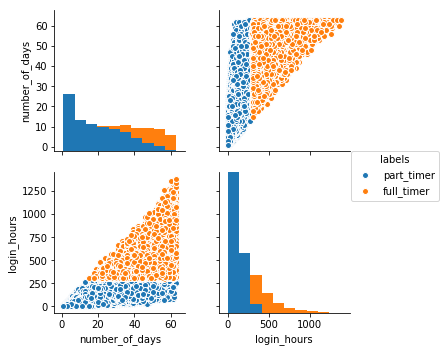

In [56]:
sns.pairplot(df1,hue="labels")
print("\n")
df1["labels"].value_counts()

In [57]:
df2 = df1

Second prediction model

In [59]:
df2 = df2.drop("labels",axis=1)

In [62]:
df2["hours_per_day"] = df2["login_hours"]/df2["number_of_days"]

In [64]:
df2 = df2.drop("number_of_days",axis=1)

In [65]:
df2.head()

,login_hours,hours_per_day
car_number,,
A29TV6235,9.846944,1.230868
AP01TV0821,63.160556,9.022937
AP01TV0906,236.926389,8.461657
AP02TV1883,320.696389,7.288554
AP02TV2215,55.156667,6.894583


In [66]:
kmeans.fit(df2.values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [67]:
df2["labels"] = kmeans.labels_

In [69]:
df2["labels"] = df2["labels"].map({0:"part_timer",1:"full_timer"})

part_timer    37658
full_timer    12469
Name: labels, dtype: int64

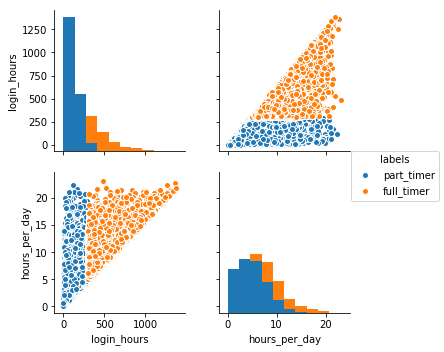

In [101]:
sns.pairplot(df2,hue="labels")
print("\n")
df2["labels"].value_counts()

In [ ]:
#####3rd Prediction model

In [71]:
df3 = df1

In [74]:
df3 = df3.drop("labels",axis=1)

In [75]:
df3["hour_per_day"] = df3["login_hours"]/df3["number_of_days"]

In [77]:
df3 = df3.drop("login_hours",axis=1)

In [78]:
df3.head()

,number_of_days,hour_per_day
car_number,,
A29TV6235,8,1.230868
AP01TV0821,7,9.022937
AP01TV0906,28,8.461657
AP02TV1883,44,7.288554
AP02TV2215,8,6.894583


In [79]:
kmeans.fit(df3.values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [80]:
kmeans.labels_

array([0, 0, 0, ..., 0, 1, 1], dtype=int32)

In [81]:
df3["labels"] = kmeans.labels_

In [83]:
df3["labels"] = df3["labels"].map({0:"part_timer",1:"full_timer"})

part_timer    27706
full_timer    22421
Name: labels, dtype: int64

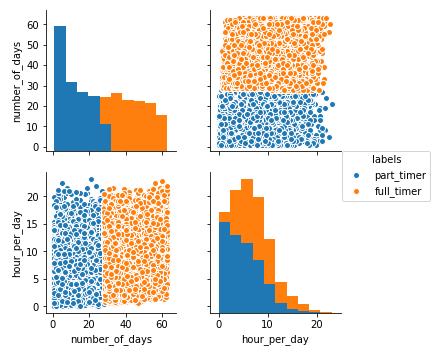

In [100]:
sns.pairplot(df3,hue="labels")
print("\n")
df3["labels"].value_counts()

In [85]:
###### 4th prediction model

In [89]:
df4 = df4.drop("labels",axis=1)

In [90]:
df4["hours_per_day"] = df4["login_hours"]/df4["number_of_days"]

In [91]:
kmeans2 = KMeans(n_clusters=2)

In [92]:
df4.head()

,number_of_days,login_hours,hours_per_day
car_number,,,
A29TV6235,8,9.846944,1.230868
AP01TV0821,7,63.160556,9.022937
AP01TV0906,28,236.926389,8.461657
AP02TV1883,44,320.696389,7.288554
AP02TV2215,8,55.156667,6.894583


In [93]:
kmeans2.fit(df4.values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [94]:
df4["labels"] = kmeans2.labels_

In [96]:
df4["labels"] = df4["labels"].map({0:"part_timer",1:"full_timer"})

part_timer    37663
full_timer    12464
Name: labels, dtype: int64

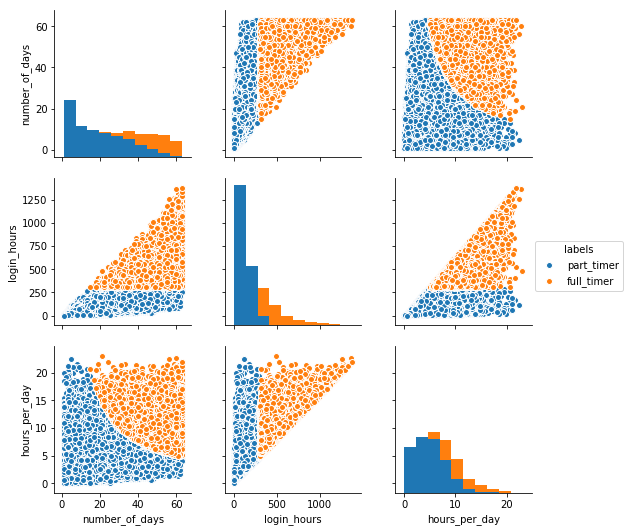

In [99]:
sns.pairplot(df4,hue="labels")
print("\n")
df4["labels"].value_counts()

In [102]:
df4

,number_of_days,login_hours,hours_per_day,labels
car_number,,,,
A29TV6235,8,9.846944,1.230868,part_timer
AP01TV0821,7,63.160556,9.022937,part_timer
AP01TV0906,28,236.926389,8.461657,part_timer
AP02TV1883,44,320.696389,7.288554,full_timer
AP02TV2215,8,55.156667,6.894583,part_timer
AP02TV2290,15,23.669167,1.577944,part_timer
AP02TV2579,29,321.905556,11.100192,full_timer
AP02TV6490,21,110.266389,5.250780,part_timer
AP02TV6695,8,92.548056,11.568507,part_timer
